In [19]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler, LabelEncoder
import joblib

In [2]:
#from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
#heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
#X = heart_disease.data.features 
#y = heart_disease.data.targets 

#data = pd.DataFrame(X)
#data['num'] = y
#data.to_csv('../data/data.csv',index=False)

In [3]:
data = pd.read_csv('../data/data.csv')

In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [5]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

## Numerical features

In [6]:
numerical_cols = data.select_dtypes(include=["float64", "int64"]).columns.tolist()

## Handeling missing data

In [7]:
data[numerical_cols] = data[numerical_cols].apply(lambda col: col.fillna(col.mean()))

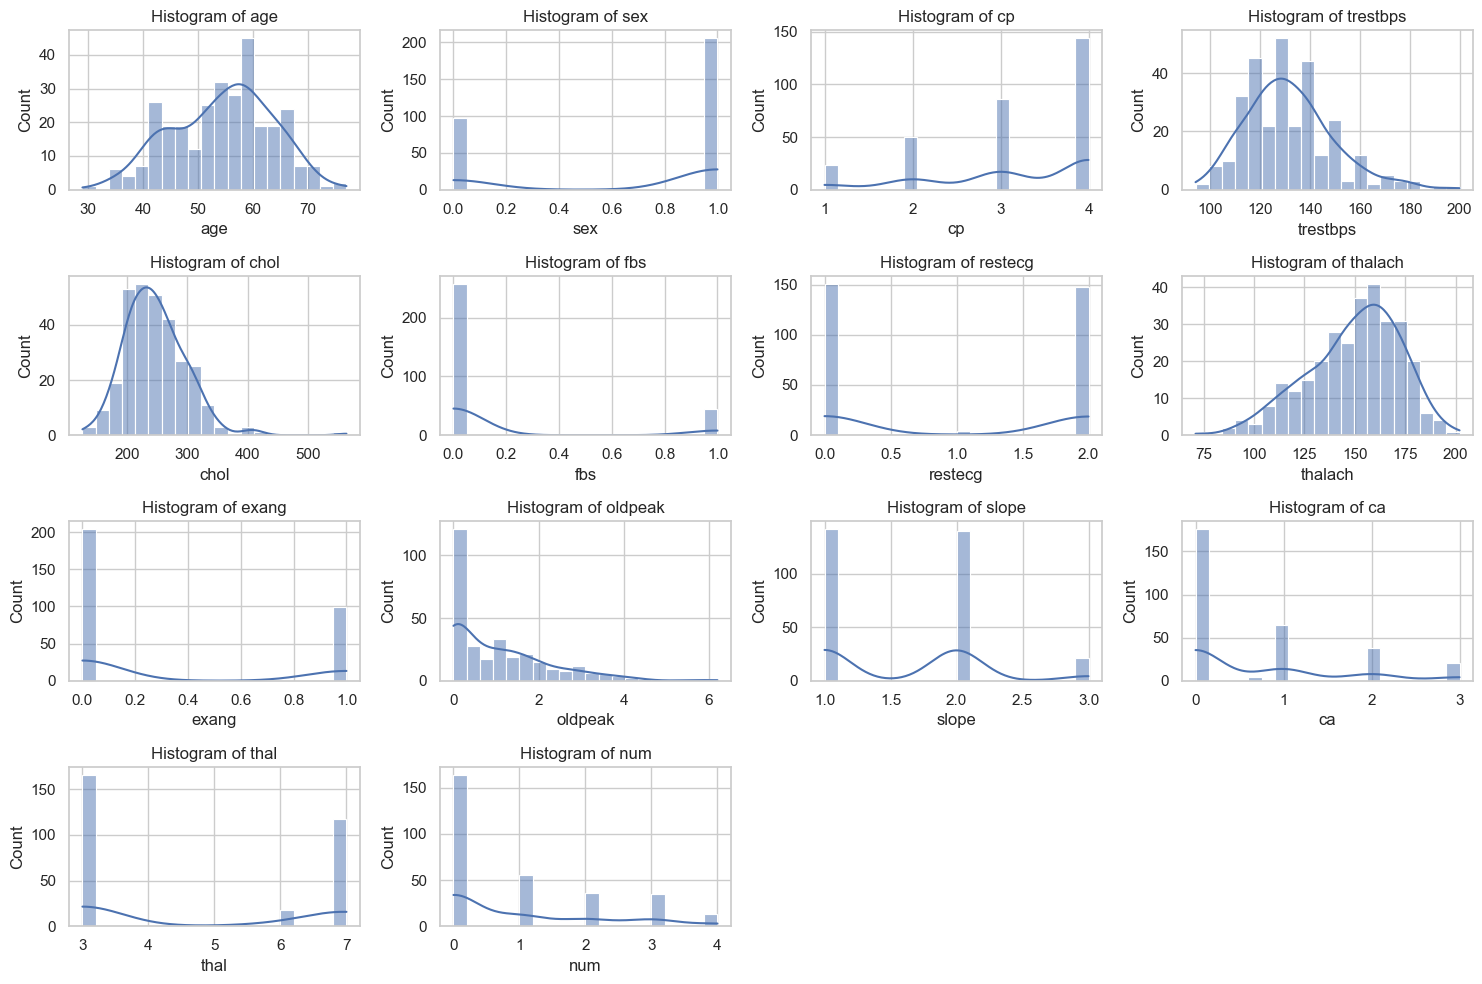

In [8]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data[feature], bins=20, kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

In [9]:
numerical_cols

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'num']

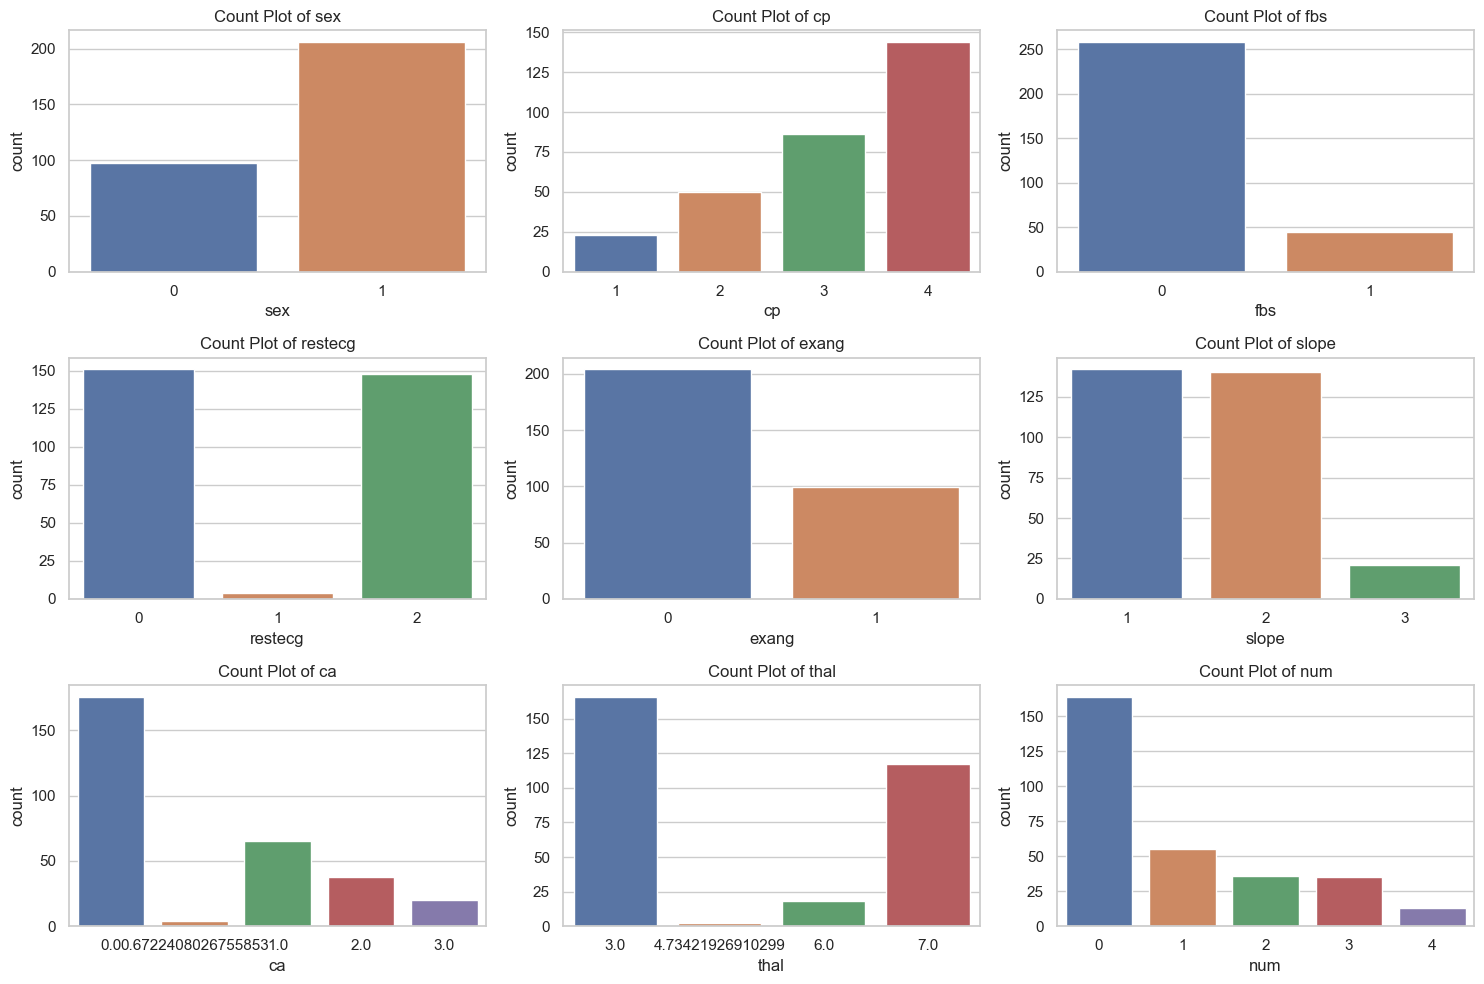

In [10]:
selected = ['sex', 'cp','fbs', 'restecg', 'exang','slope','ca','thal', 'num']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=feature, data=data)
    plt.title(f'Count Plot of {feature}')
plt.tight_layout()
plt.show()

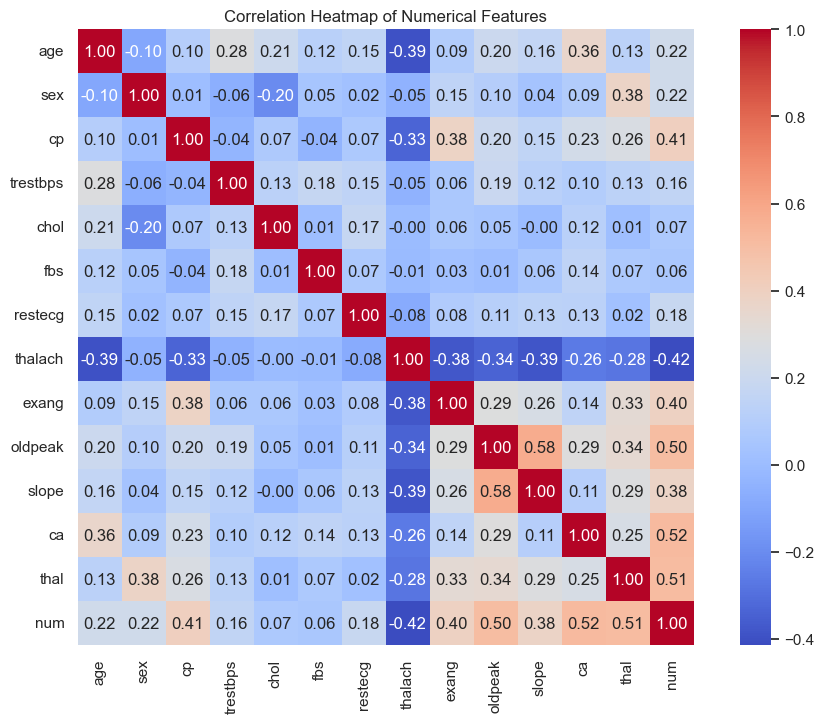

In [11]:
plt.figure(figsize=(12, 8))
correlation = data[numerical_cols].corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

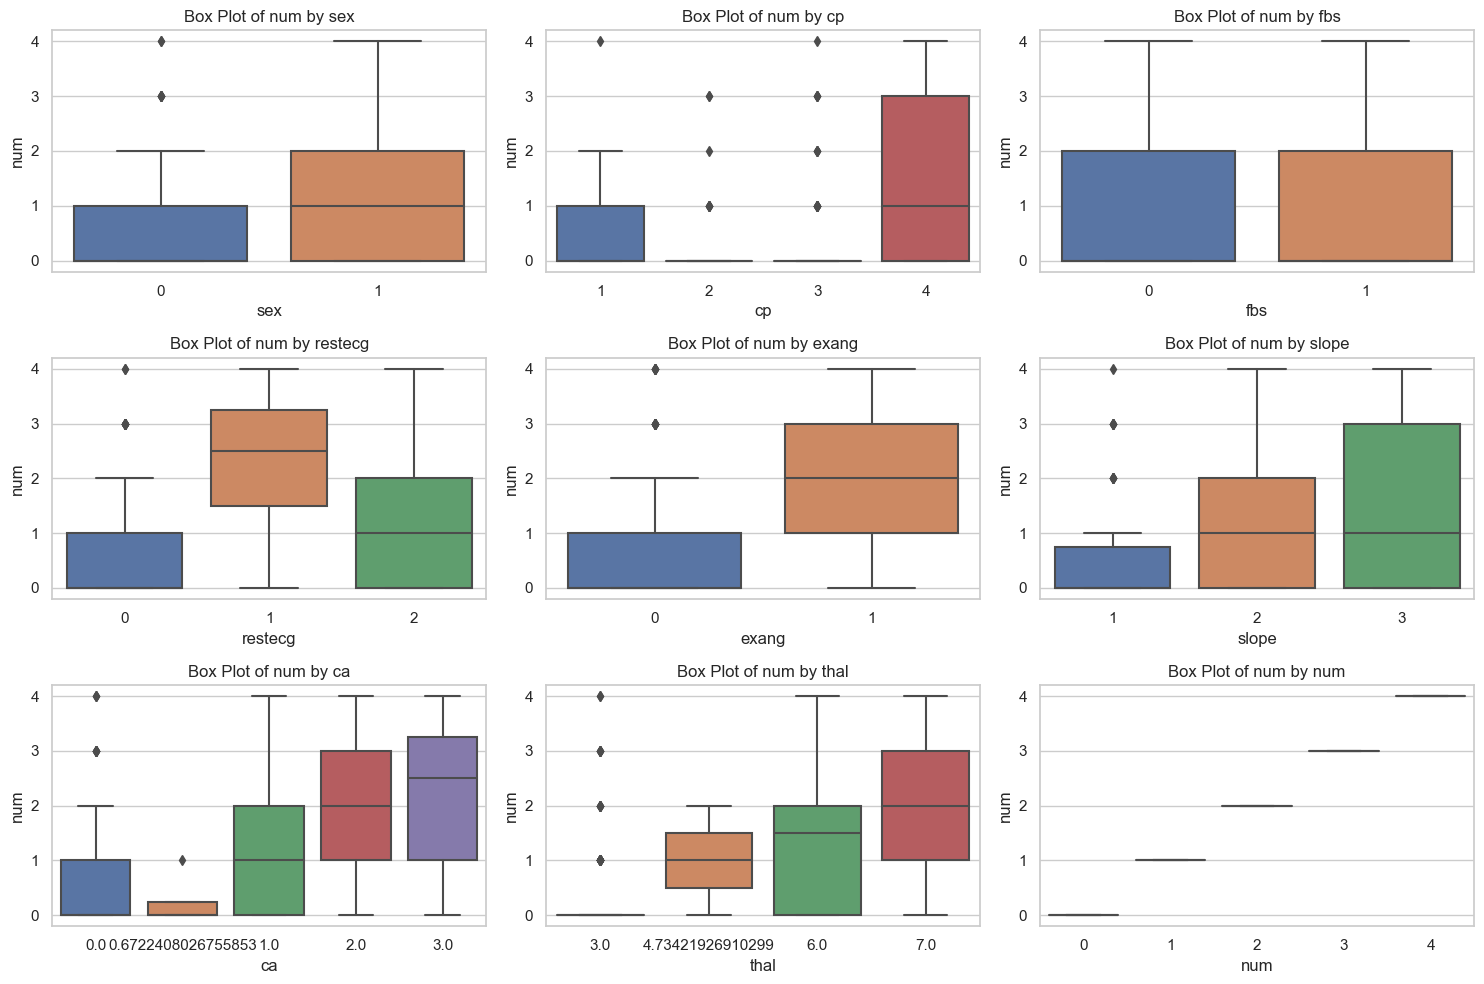

In [12]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=feature, y='num', data=data)
    plt.title(f'Box Plot of num by {feature}')
plt.tight_layout()
plt.show()

## Standardize numerical features

In [13]:
selected_to_scale = list(set(numerical_cols) - set(selected))

In [20]:
selected_to_scale = ['cp','thalach','thal','ca','oldpeak','age']

In [21]:
scaler = StandardScaler()
data[selected_to_scale] = scaler.fit_transform(data[selected_to_scale])

In [22]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## Convert target to binary (0 = no disease, 1 = disease)

In [16]:
data["num"] = (data["num"] > 0).astype(int)

In [17]:
# saving the cleaned data
data.to_csv('../data/clean_data.csv',index=False)

In [ ]:
data = pd.read_csv('../data/clean_data.csv')